#### Importing Libraries
- *pandas*: Data manipulation and analysis.
- *seaborn*: Data visualization.
- *sklearn*: Model selection, Naive Bayes, Logistic Regression, and metrics.
- *matplotlib.pyplot*: Plotting.
- *numpy*: Numerical computations.

In [64]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

#### Loading and Inspecting the Dataset

- **Dataset**: The `penguins` dataset is loaded using `seaborn`'s `load_dataset` function.
- **Dataset Size**: The total number of elements in the dataset is printed using `all_data.size`.
- **Dataset Shape**: The dimensions of the dataset (rows and columns) are displayed using `all_data.shape`.

This provides an overview of the dataset's size and structure for further analysis.


In [65]:
all_data = sns.load_dataset('penguins')
print(all_data.size)
print(all_data.shape)

2408
(344, 7)


#### Checking Unique Species

Used the `unique()` function on the `species` column to find all the distinct species in the dataset. This gives a quick look at the different types of penguins present.

In [66]:
species_distinct = all_data['species'].unique()
print(species_distinct)

['Adelie' 'Chinstrap' 'Gentoo']


#### Filtering for Adelie and Gentoo Penguins

Filtered the dataset to include only `Adelie` and `Gentoo` species using the `isin()` function. This narrows down the data to focus on these two species. The size and shape of the filtered data are printed to confirm the changes.

In [67]:
req_data = all_data[all_data['species'].isin(['Adelie', 'Gentoo'])]
print(req_data.size)
print(req_data.shape)

1932
(276, 7)


#### Removing Missing Values

Used `dropna()` to remove any rows with missing values from the filtered dataset. This step ensures that we only work with complete data for the analysis.

In [68]:
req_data = req_data.dropna()

#### One-Hot Encoding Categorical Variables

Applied `pd.get_dummies()` to convert the `sex` and `island` columns into one-hot encoded variables. The `drop_first=True` argument ensures that the first category in each column is dropped to avoid multicollinearity, making the dataset ready for machine learning models.

In [69]:
req_data = pd.get_dummies(req_data, columns=['sex', 'island'], drop_first=True)

In [70]:
req_data.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Male', 'island_Dream', 'island_Torgersen'],
      dtype='object')

#### Preparing Features and Labels

- **Features (X)**: Selected relevant columns from the filtered dataset (`req_data`) for the features: `island_Dream`, `island_Torgersen`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex_Male`.
- **Labels (y)**: The target variable, `species`, is mapped to numerical values using the `map()` function, where `Adelie` is labeled as `0` and `Gentoo` as `1`. This prepares the dataset for classification.

In [71]:
X = req_data[['island_Dream', 'island_Torgersen', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Male']]
y = req_data['species']
y = y.map({'Adelie':0, 'Gentoo':1})
X.dropna()
y = y[X.index]

#### Splitting the Dataset

Used `train_test_split()` to divide the dataset into training and testing sets. The feature set (`X`) and target variable (`y`) are split with 80% of the data used for training and 20% for testing. The `random_state=42` ensures reproducibility of the split.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the Naive Bayes Model

- A `GaussianNB` model is initialized and trained using the training data (`X_train` and `y_train`).
- Predictions are made on the test set (`X_test`) using the trained model.
- The model's accuracy is evaluated using `accuracy_score`, comparing the predicted labels (`y_pred_nb`) with the true labels (`y_test`).

In [73]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

#### Training the Logistic Regression Model

- A `LogisticRegression` model is initialized with a maximum of 1000 iterations for convergence.
- The model is trained using the training data (`X_train` and `y_train`).
- Predictions are made on the test set (`X_test`) using the trained model.
- The model's accuracy is evaluated using `accuracy_score`, comparing the predicted labels (`y_pred_lr`) with the true labels (`y_test`).

In [74]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

#### Model Accuracy

Both the Naive Bayes (`acc_nb`) and Logistic Regression (`acc_lr`) models achieved an accuracy of 1.0 on the test set, indicating perfect classification performance on this dataset.

In [75]:
print(acc_nb)
print(acc_lr)

1.0
1.0


#### Confusion Matrix

- **Naive Bayes Confusion Matrix (cf_nb)**: The Naive Bayes model correctly classified all instances with no false positives or false negatives.

- **Logistic Regression Confusion Matrix (cf_lr)**: Similarly, the Logistic Regression model also achieved perfect classification with no errors.

Both models show strong performance with no misclassifications in this case.


In [76]:
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_nb)
print(cf_lr)

[[33  0]
 [ 0 20]]
[[33  0]
 [ 0 20]]


#### Classification Report

- **Naive Bayes Classification Report (cr_nb)**:
  The Naive Bayes model demonstrates perfect precision, recall, and F1-score for both classes, achieving an overall accuracy of 1.00.

- **Logistic Regression Classification Report (cr_lr)**:
  The Logistic Regression model also achieves perfect results across all metrics, with an accuracy of 1.00.

Both models show exceptional performance with perfect classification for all classes.

In [77]:
cr_nb = classification_report(y_test, y_pred_nb)
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_nb)
print(cr_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



#### AUC (Area Under the Curve)

- The **Naive Bayes** and **Logistic Regression** models both achieved an AUC of 1.0 for both the training and test sets. This indicates perfect separation between the classes, with no misclassifications in terms of the probability scores predicted by the models.

In [78]:
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]
y_prob_nb_train = nb.predict_proba(X_train)[:, 1]
y_prob_lr_train = lr.predict_proba(X_train)[:, 1]
auc_nb_train = roc_auc_score(y_train, y_prob_nb_train)
auc_nb_test = roc_auc_score(y_test, y_prob_nb_test)
auc_lr_train = roc_auc_score(y_train, y_prob_lr_train)
auc_lr_test = roc_auc_score(y_test, y_prob_lr_test)

In [79]:
print("AUC (NB) - Train:", auc_nb_train)
print("AUC (NB) - Test:", auc_nb_test)
print("AUC (LR) - Train:", auc_lr_train)
print("AUC (LR) - Test:", auc_lr_test)

AUC (NB) - Train: 1.0
AUC (NB) - Test: 1.0
AUC (LR) - Train: 1.0
AUC (LR) - Test: 1.0


#### ROC Curve Comparison

The ROC curves for both **Naive Bayes** and **Logistic Regression** models are plotted. Each curve represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR). The AUC values are displayed in the legend, indicating perfect performance for both models, as their AUC values are 1.0. A diagonal line representing a random guess is also included for reference.

- The closer the curve is to the top-left corner, the better the model performance.

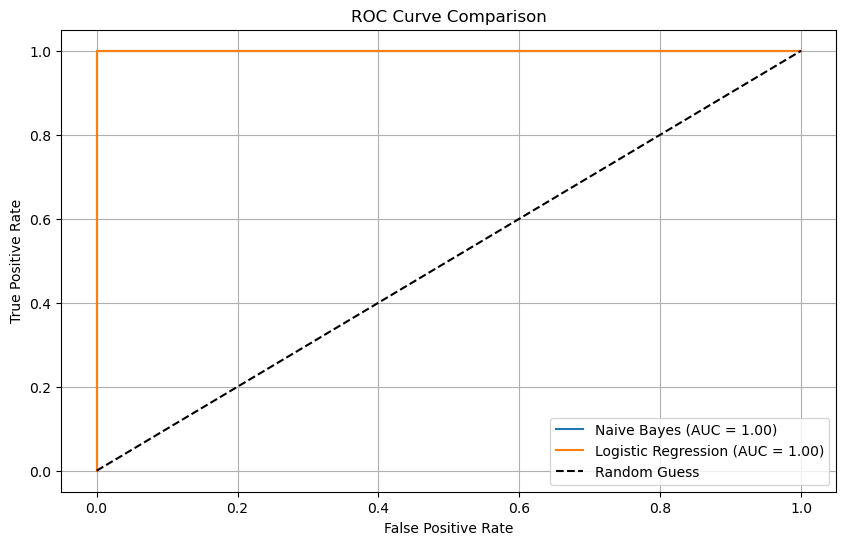

In [80]:
plt.figure(figsize=(10, 6))
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb_test)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb_test:.2f})")
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_test)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#### Lift and Gain Charts

The **Lift** and **Gain** curves for both the **Naive Bayes** and **Logistic Regression** models are plotted to evaluate model performance across different deciles of predicted probabilities.

- **Lift**: Measures the improvement of the model over random guessing. A higher lift means the model is better at identifying positive cases.
- **Gain**: Represents the cumulative percentage of positive cases captured by the model as more deciles are considered.

In both plots:
- **Blue line**: Shows the Lift at each decile.
- **Orange dashed line**: Shows the cumulative Gain at each deciles.

These charts help assess how well the models perform at different probability thresholds, with higher values indicating better performance.

In [81]:
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]

In [82]:
def compute_lift_gain(y_true, y_prob, num_deciles=10):
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob})
    df['Decile'] = pd.qcut(df['Probability'], num_deciles, labels=range(1, num_deciles + 1))
    grouped = df.groupby('Decile', observed=False).agg(
        Positives=('Actual', 'sum'),
        Count=('Actual', 'size')
    ).sort_index(ascending=False)
    grouped['Cumulative Positives'] = grouped['Positives'].cumsum()
    grouped['Cumulative Percentage'] = grouped['Cumulative Positives'] / df['Actual'].sum() * 100
    grouped['Lift'] = (grouped['Positives'] / grouped['Count']) / (df['Actual'].sum() / len(df))
    return grouped

In [83]:
lift_gain_nb = compute_lift_gain(y_test, y_prob_nb_test)
lift_gain_lr = compute_lift_gain(y_test, y_prob_lr_test)

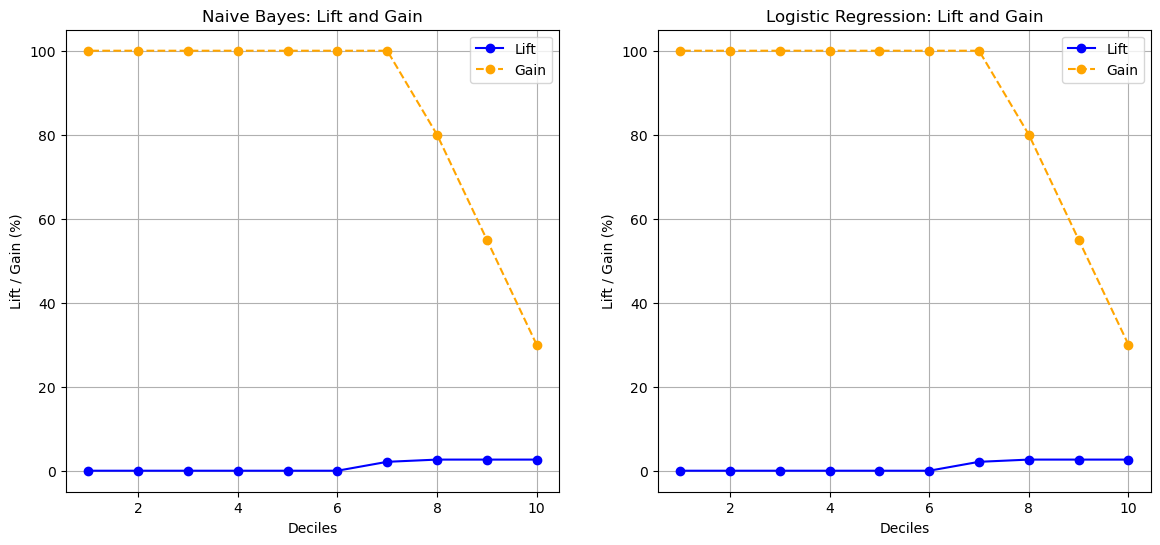

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(lift_gain_nb.index, lift_gain_nb['Lift'], label='Lift', color='blue', marker='o')
axes[0].plot(lift_gain_nb.index, lift_gain_nb['Cumulative Percentage'], label='Gain', color='orange', linestyle='--', marker='o')
axes[0].set_title("Naive Bayes: Lift and Gain")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Lift / Gain (%)")
axes[0].legend(loc="best")
axes[0].grid()

axes[1].plot(lift_gain_lr.index, lift_gain_lr['Lift'], label='Lift', color='blue', marker='o')
axes[1].plot(lift_gain_lr.index, lift_gain_lr['Cumulative Percentage'], label='Gain', color='orange', linestyle='--', marker='o')
axes[1].set_title("Logistic Regression: Lift and Gain")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift / Gain (%)")
axes[1].legend(loc="best")
axes[1].grid()